In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)


10000

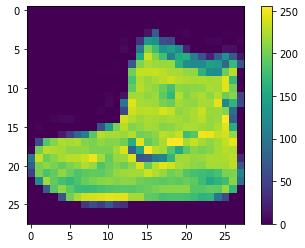

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0


<function matplotlib.pyplot.show(close=None, block=None)>

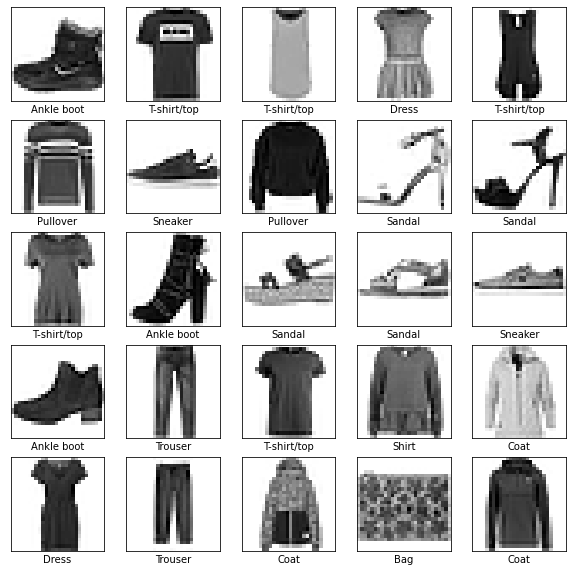

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [13]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10)
])


In [15]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 712us/step - loss: 0.6341 - accuracy: 0.7814
Epoch 2/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.3936 - accuracy: 0.8581
Epoch 3/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.3465 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.3186 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 1s 622us/step - loss: 0.2983 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.2860 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2710 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.2559 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.2490 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 1s 642u

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3494 - accuracy: 0.8823

Test accuracy: 0.8823000192642212


In [18]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


In [19]:
predictions[0]


array([2.8227172e-08, 1.0554119e-09, 5.8214518e-09, 1.5738192e-09,
       1.4662007e-08, 8.7445209e-05, 6.1662980e-08, 4.6657627e-03,
       3.3241645e-07, 9.9524635e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])


9

In [21]:
test_labels[0]


9

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [36]:
i = 0
plt.figure(figsize=(6,3))

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

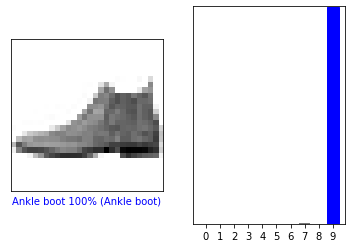

In [37]:
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


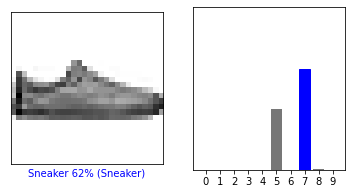

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

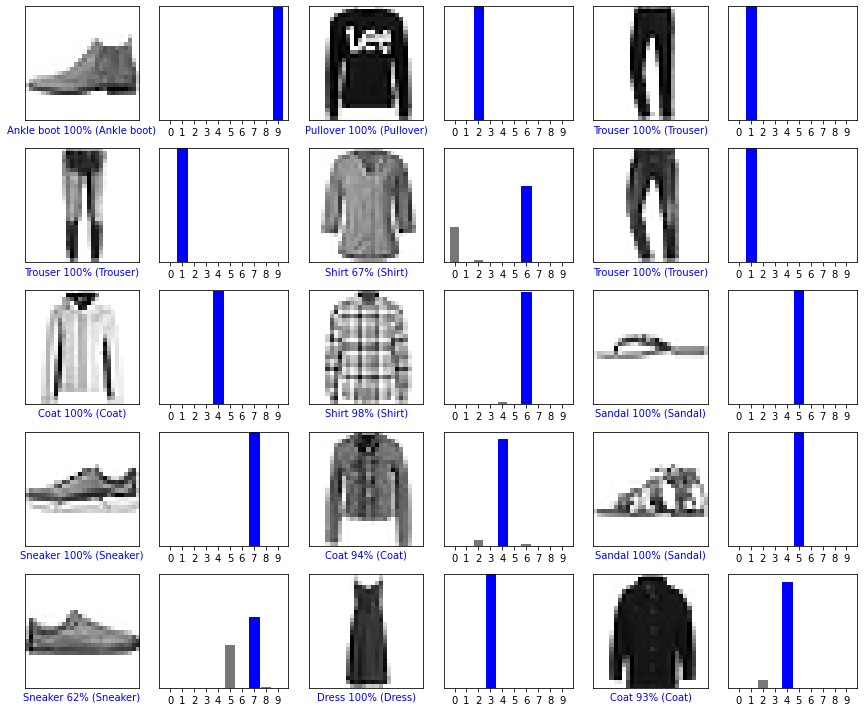

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)


(28, 28)


In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[7.6282972e-06 2.2538081e-14 9.9963832e-01 1.3661411e-10 3.4602196e-04
  5.1080960e-13 7.9428091e-06 5.7185746e-19 6.3258322e-11 1.5919929e-13]]


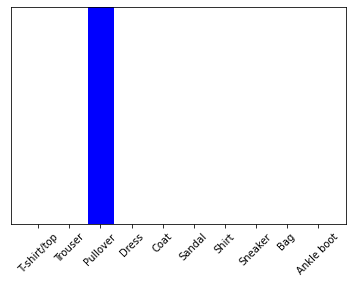

In [43]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

2